<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# HW: Stochastics

### due 2023-03-06 ###

* Yu-Ching Liao <ycliao3@illinois.edu>


## imports and graphics configurations

In [1]:
import numpy as np
import pandas as pd
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter

In [87]:
import copy
N_samples=2000
delta=0.01
T=10
tvals=np.arange(0,T,step=delta)

In [88]:
def generate_RW(t):
    tvals=np.arange(0,t+delta,step=delta)
    dRW = pd.DataFrame(scipy.stats.norm.rvs(scale=np.sqrt(delta),
                                            size=(len(tvals))),
                       index=tvals,
                       columns=["RW"])
    dRW.loc[0, :] = 0
    RW = dRW.cumsum(axis='index')
    return RW

def sgn(x):
    if x>0: return 1
    elif x<0: return -1
    else: return 0

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,-0.043677,-0.091709,0.031945,-0.088902,0.086663,0.024099,-0.045931,-0.056261,0.101030,0.069308,...,0.035683,0.136681,-0.067475,-0.022223,-0.041398,-0.144247,0.118637,-0.012085,0.048504,-0.020285
0.02,0.060743,-0.054671,-0.133059,-0.173567,0.132436,0.001264,-0.147568,-0.138640,0.165917,0.116899,...,-0.046898,0.003934,-0.094413,-0.121386,-0.166220,-0.120273,0.277974,0.022715,0.298547,0.003648
0.03,0.125777,-0.154777,-0.116420,-0.282365,0.152102,-0.076225,0.087950,-0.104988,0.289395,0.030072,...,-0.029216,0.400646,-0.132143,-0.298553,-0.364420,-0.205434,0.381431,0.016726,0.420409,0.032117
0.04,0.165882,-0.212027,-0.089729,-0.400199,0.148335,-0.128510,0.080090,-0.183874,0.231590,0.176224,...,-0.033147,0.470042,-0.169708,-0.282419,-0.362862,-0.393438,0.274699,0.049405,0.491592,-0.274666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.95,-8.092003,2.022876,1.550248,0.101712,4.150362,0.168351,3.037977,2.645097,-6.230269,-0.588200,...,4.067442,-2.485132,-0.298639,-4.228625,0.507595,1.367221,-2.514570,7.499342,1.030768,2.253825
9.96,-8.062310,1.896713,1.531796,0.103155,4.056250,0.107036,2.857979,2.765561,-6.134206,-0.599727,...,4.121877,-2.452089,-0.356104,-4.123063,0.699121,1.373084,-2.471947,7.429520,1.125325,2.316913
9.97,-7.976768,1.979396,1.475112,0.108596,4.192289,-0.091657,2.893384,2.741474,-5.978847,-0.613420,...,3.962672,-2.484353,-0.465594,-4.127093,0.696217,1.212017,-2.502866,7.501070,1.000439,2.428014
9.98,-8.127766,2.009652,1.458991,0.146083,4.350726,-0.209013,2.923326,2.870663,-5.958779,-0.746284,...,4.146422,-2.592380,-0.433870,-4.086000,0.731622,1.259674,-2.518608,7.524431,0.990834,2.531362


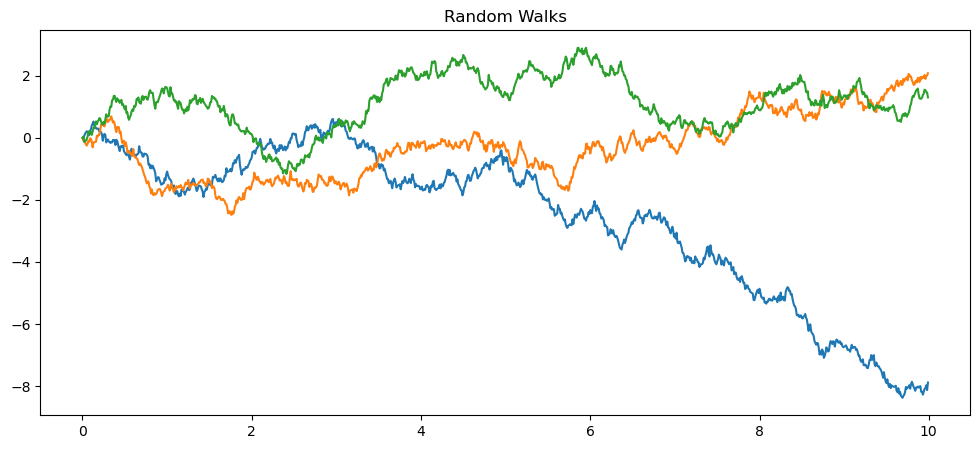

In [89]:
dRW=pd.DataFrame(scipy.stats.norm.rvs(scale=np.sqrt(delta),size=(len(tvals),N_samples)),index=tvals)
dRW.loc[0,:]=0
RW=dRW.cumsum(axis='index')
display(RW)

plt.figure(figsize=[12,5])
plt.title("Random Walks")
plt.plot(RW[[0, 1, 2]])
plt.show()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


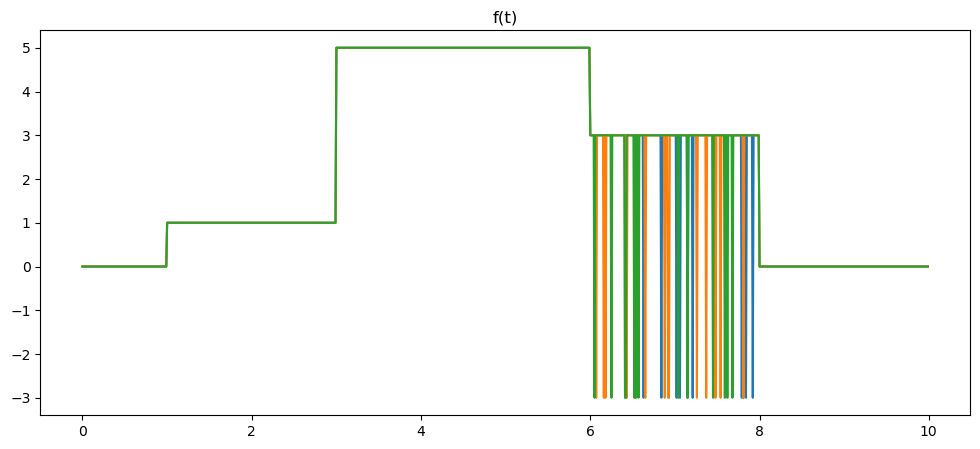

In [101]:
col_index = np.arange(2000)

# Initialize dataframe with zeros
fs = pd.DataFrame(0, index=tvals, columns=col_index)

# Set values based on specified conditions
fs.loc[fs.index < 1] = 0
fs.loc[(fs.index >= 1) & (fs.index < 3)] = 1
fs.loc[(fs.index >= 3) & (fs.index < 6)] = 5
fs.loc[(fs.index >= 6) & (fs.index < 8)] = 3 * np.sign(
    scipy.stats.norm.rvs(scale=2, size=(200, 2000)) + 3)

display(fs)

plt.figure(figsize=[12, 5])
plt.title("f(t)")
plt.plot(fs[[0, 1, 2]])
plt.show()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0.00,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
0.01,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
0.02,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
0.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
0.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.95,6.068883,-8.892988,-7.612024,3.536843,-4.848201,4.65728,-16.195983,8.503214,10.172203,14.547568,...,6.824679,7.176811,3.937256,3.394928,-0.669961,8.770189,-2.372586,4.467486,4.953248,-11.469596
9.96,6.068883,-8.892988,-7.612024,3.536843,-4.848201,4.65728,-16.195983,8.503214,10.172203,14.547568,...,6.824679,7.176811,3.937256,3.394928,-0.669961,8.770189,-2.372586,4.467486,4.953248,-11.469596
9.97,6.068883,-8.892988,-7.612024,3.536843,-4.848201,4.65728,-16.195983,8.503214,10.172203,14.547568,...,6.824679,7.176811,3.937256,3.394928,-0.669961,8.770189,-2.372586,4.467486,4.953248,-11.469596
9.98,6.068883,-8.892988,-7.612024,3.536843,-4.848201,4.65728,-16.195983,8.503214,10.172203,14.547568,...,6.824679,7.176811,3.937256,3.394928,-0.669961,8.770189,-2.372586,4.467486,4.953248,-11.469596


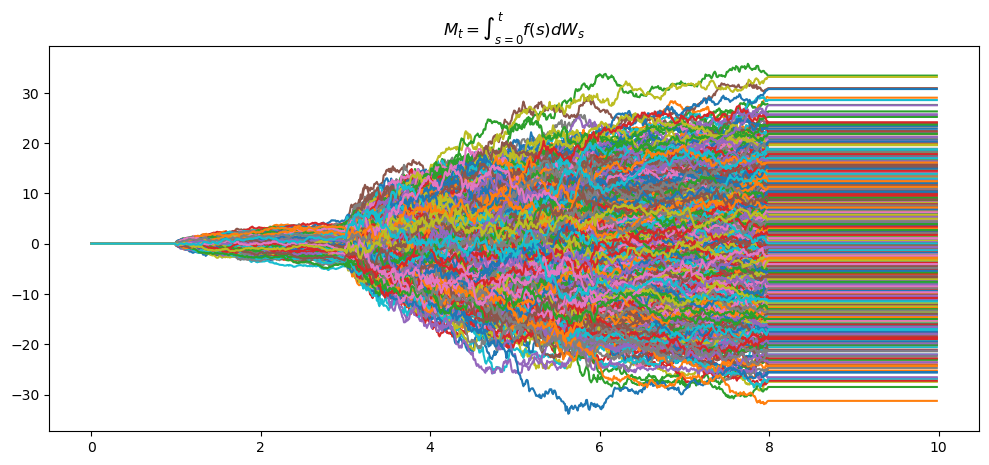

In [201]:
simulated_integral=(fs*(RW.shift(-1)-RW)).cumsum()

display(simulated_integral)
plt.figure(figsize=[12,5])
plt.title("$M_t = \int_{s=0}^t f(s) dW_s$")
plt.plot(simulated_integral)
plt.show()

# **Ito Integration** #

**Martingale Properties:** Define
$$ f(t)=\begin{cases} 1 & \text{if $1\le t< 3$}\\
5 &\text{if $3\le t<6$}\\
3 \text{sgn}(W_4+3) &\text{if $6\le t<8$}
 \end{cases} $$ 
and then define
$$ M_t = \int_{s=0}^t f(s)dW_s $$
By simulation, compute
* $E[M_8]$
* $E[M_4]$
* $E[M_9]$
* $E[M_8 |W_2|^\pi]-E[M_2|W_2|^\pi]$
* $E[M_4 \cos(W_2)]-E[M_2\cos(W_2)]$
* $E[M_9 W_7^2]-E[M_7W_7^2]$

## Defination 

## $E[M_8]$

Computational Mean: 0.19007710126390345


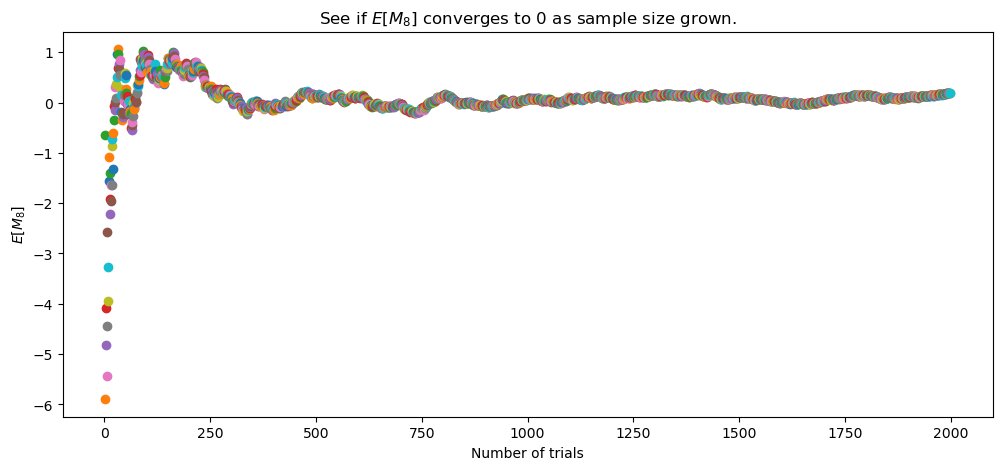

In [102]:
dRW=pd.DataFrame(scipy.stats.norm.rvs(scale=np.sqrt(delta),size=(len(tvals),N_samples)),index=tvals)
dRW.loc[0,:]=0
RW=dRW.cumsum(axis='index')

col_index = np.arange(2000)

# Initialize dataframe with zeros
fs = pd.DataFrame(0, index=tvals, columns=col_index)

# Set values based on specified conditions
fs.loc[fs.index < 1] = 0
fs.loc[(fs.index >= 1) & (fs.index < 3)] = 1
fs.loc[(fs.index >= 3) & (fs.index < 6)] = 5
fs.loc[(fs.index >= 6) & (fs.index < 8)] = 3 * np.sign(
    scipy.stats.norm.rvs(scale=2, size=(200, 2000)) + 3)

simulated_integral=(fs*(RW.shift(-1)-RW)).cumsum()


print("Computational Mean:", simulated_integral.loc[8].mean())
plt.figure(figsize=[12,5])
for i in simulated_integral.columns:
    plt.scatter(i, simulated_integral[simulated_integral.columns[0:i]].loc[8].mean())
plt.xlabel("Number of trials")
plt.ylabel("$E[M_8]$")
plt.title("See if $E[M_8]$ converges to 0 as sample size grown.")
plt.show()

## $E[M_4]$

Computational Mean: -0.09580127336007721


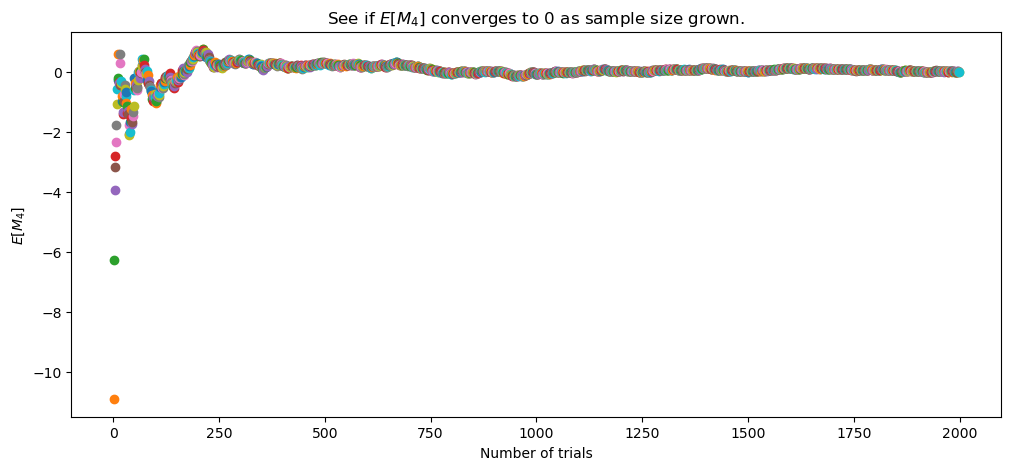

In [103]:
dRW=pd.DataFrame(scipy.stats.norm.rvs(scale=np.sqrt(delta),size=(len(tvals),N_samples)),index=tvals)
dRW.loc[0,:]=0
RW=dRW.cumsum(axis='index')

col_index = np.arange(2000)

# Initialize dataframe with zeros
fs = pd.DataFrame(0, index=tvals, columns=col_index)

# Set values based on specified conditions
fs.loc[fs.index < 1] = 0
fs.loc[(fs.index >= 1) & (fs.index < 3)] = 1
fs.loc[(fs.index >= 3) & (fs.index < 6)] = 5
fs.loc[(fs.index >= 6) & (fs.index < 8)] = 3 * np.sign(
    scipy.stats.norm.rvs(scale=2, size=(200, 2000)) + 3)

simulated_integral=(fs*(RW.shift(-1)-RW)).cumsum()

print("Computational Mean:", simulated_integral.loc[4].mean())
plt.figure(figsize=[12,5])
for i in simulated_integral.columns:
    plt.scatter(i, simulated_integral[simulated_integral.columns[0:i]].loc[8].mean())
plt.xlabel("Number of trials")
plt.ylabel("$E[M_4]$ ")
plt.title("See if $E[M_4]$ converges to 0 as sample size grown.")
plt.show()

## $E[M_9]$

Computational Mean: -0.3533456492671474


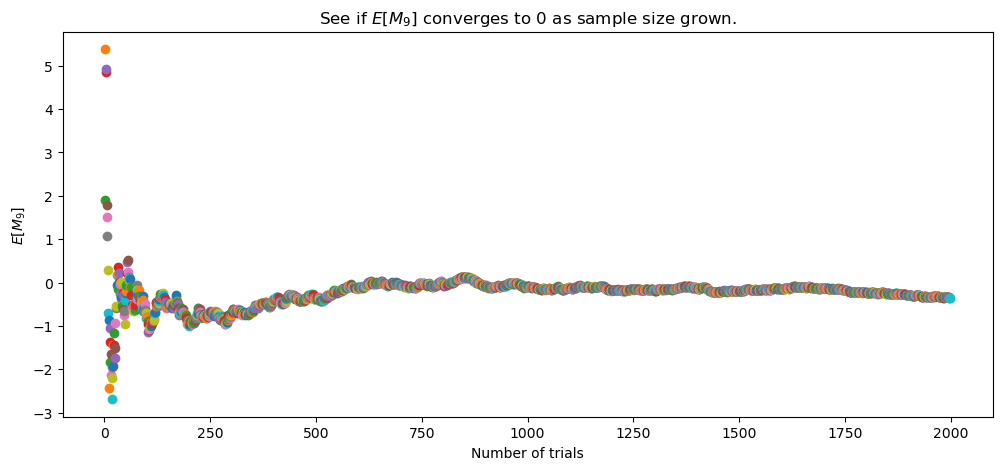

In [104]:
dRW=pd.DataFrame(scipy.stats.norm.rvs(scale=np.sqrt(delta),size=(len(tvals),N_samples)),index=tvals)
dRW.loc[0,:]=0
RW=dRW.cumsum(axis='index')

col_index = np.arange(2000)

# Initialize dataframe with zeros
fs = pd.DataFrame(0, index=tvals, columns=col_index)

# Set values based on specified conditions
fs.loc[fs.index < 1] = 0
fs.loc[(fs.index >= 1) & (fs.index < 3)] = 1
fs.loc[(fs.index >= 3) & (fs.index < 6)] = 5
fs.loc[(fs.index >= 6) & (fs.index < 8)] = 3 * np.sign(
    scipy.stats.norm.rvs(scale=2, size=(200, 2000)) + 3)

simulated_integral=(fs*(RW.shift(-1)-RW)).cumsum()

print("Computational Mean:", simulated_integral.loc[9].mean())
plt.figure(figsize=[12,5])
for i in simulated_integral.columns:
    plt.scatter(i, simulated_integral[simulated_integral.columns[0:i]].loc[8].mean())
plt.xlabel("Number of trials")
plt.ylabel("$E[M_9]$ ")
plt.title("See if $E[M_9]$ converges to 0 as sample size grown.")
plt.show()

## $E[M_8 |W_2|^\pi]-E[M_2|W_2|^\pi]$

Computational Mean: -0.43768989678209225


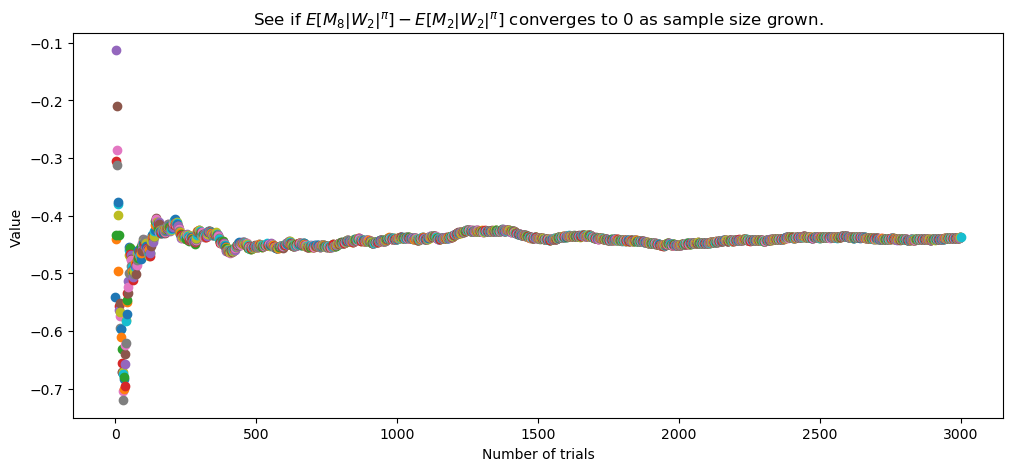

In [208]:
dRW = pd.DataFrame(scipy.stats.norm.rvs(scale=np.sqrt(delta),
                                        size=(len(tvals), N_samples)),
                   index=tvals)
dRW.loc[0, :] = 0
RW = dRW.cumsum(axis='index')

col_index = np.arange(2000)

# Initialize dataframe with zeros
fs = pd.DataFrame(0, index=tvals, columns=col_index)

# Set values based on specified conditions
fs.loc[fs.index < 1] = 0
fs.loc[(fs.index >= 1) & (fs.index < 3)] = 1
fs.loc[(fs.index >= 3) & (fs.index < 6)] = 5
fs.loc[(fs.index >= 6) & (fs.index < 8)] = 3 * np.sign(
    scipy.stats.norm.rvs(scale=2, size=(200, 2000)) + 3)

simulated_integral = (fs * (RW.shift(-1) - RW)).cumsum()


s1 = []
for i in range(3000):
    X = simulated_integral.loc[8] * abs(scipy.stats.norm.rvs(scale=np.sqrt(2),size=2000))**2
    Y = simulated_integral.loc[2] * abs(scipy.stats.norm.rvs(scale=np.sqrt(2),size=2000))**2
    s1.append(X.mean() - Y.mean())
    
    
s1 = np.array(s1)
print("Computational Mean:", np.mean(s1))
plt.figure(figsize=[12, 5])
for i in range(len(s1)):
    plt.scatter(i, s1[:i+1].mean())


plt.xlabel("Number of trials")
plt.ylabel("Value ")
plt.title(
    "See if $E[M_8 |W_2|^\pi]-E[M_2|W_2|^\pi]$ converges to 0 as sample size grown."
)
plt.show()

## $E[M_4 \cos(W_2)]-E[M_2\cos(W_2)]$

Computational Mean: 0.006795884771893721


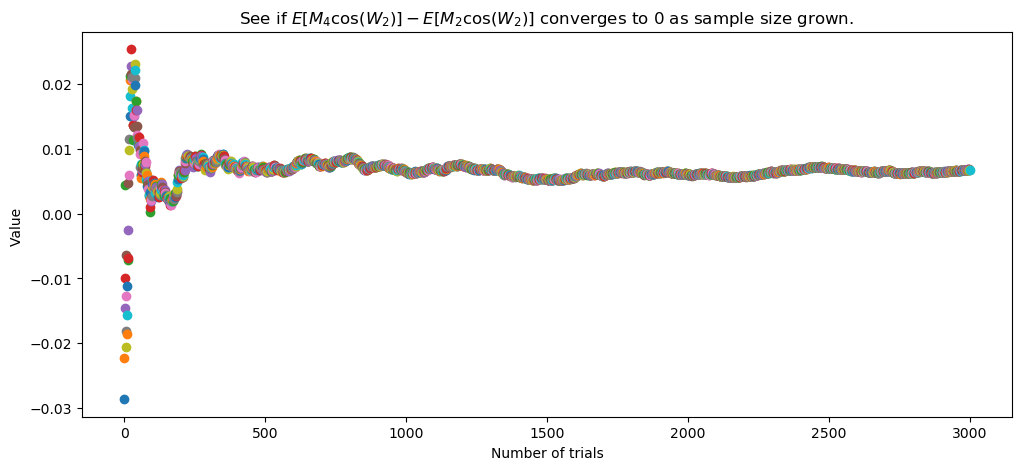

In [209]:
dRW = pd.DataFrame(scipy.stats.norm.rvs(scale=np.sqrt(delta),
                                        size=(len(tvals), N_samples)),
                   index=tvals)
dRW.loc[0, :] = 0
RW = dRW.cumsum(axis='index')

col_index = np.arange(2000)

# Initialize dataframe with zeros
fs = pd.DataFrame(0, index=tvals, columns=col_index)

# Set values based on specified conditions
fs.loc[fs.index < 1] = 0
fs.loc[(fs.index >= 1) & (fs.index < 3)] = 1
fs.loc[(fs.index >= 3) & (fs.index < 6)] = 5
fs.loc[(fs.index >= 6) & (fs.index < 8)] = 3 * np.sign(
    scipy.stats.norm.rvs(scale=2, size=(200, 2000)) + 3)

simulated_integral = (fs * (RW.shift(-1) - RW)).cumsum()


s1 = []
for i in range(3000):
    X = simulated_integral.loc[4] * np.cos(scipy.stats.norm.rvs(scale=np.sqrt(2),size=2000))
    Y = simulated_integral.loc[2] * np.cos(scipy.stats.norm.rvs(scale=np.sqrt(2),size=2000))
    s1.append(X.mean() - Y.mean())
    
    
    
s1 = np.array(s1)
print("Computational Mean:", np.mean(s1))
plt.figure(figsize=[12, 5])
for i in range(len(s1)):
    plt.scatter(i, s1[:i+1].mean())


plt.xlabel("Number of trials")
plt.ylabel("Value ")
plt.title(
    "See if $E[M_4 \cos(W_2)]-E[M_2\cos(W_2)]$ converges to 0 as sample size grown."
)
plt.show()

## $E[M_9 W_7^2]-E[M_7W_7^2]$

Computational Mean: -0.11673526013282731


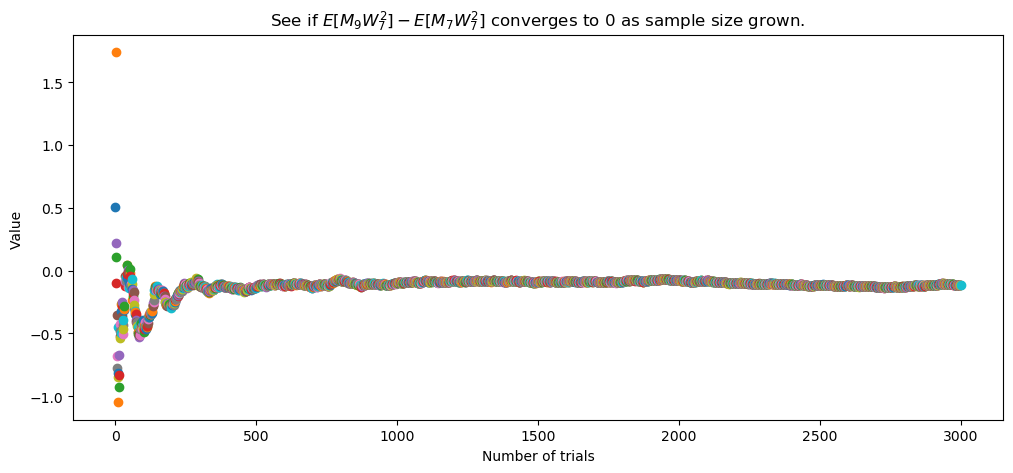

In [210]:
dRW = pd.DataFrame(scipy.stats.norm.rvs(scale=np.sqrt(delta),
                                        size=(len(tvals), N_samples)),
                   index=tvals)
dRW.loc[0, :] = 0
RW = dRW.cumsum(axis='index')

col_index = np.arange(2000)

# Initialize dataframe with zeros
fs = pd.DataFrame(0, index=tvals, columns=col_index)

# Set values based on specified conditions
fs.loc[fs.index < 1] = 0
fs.loc[(fs.index >= 1) & (fs.index < 3)] = 1
fs.loc[(fs.index >= 3) & (fs.index < 6)] = 5
fs.loc[(fs.index >= 6) & (fs.index < 8)] = 3 * np.sign(
    scipy.stats.norm.rvs(scale=2, size=(200, 2000)) + 3)

simulated_integral = (fs * (RW.shift(-1) - RW)).cumsum()


s1 = []
for i in range(3000):
    X = simulated_integral.loc[9] * (scipy.stats.norm.rvs(scale=np.sqrt(7),size=2000))**2
    Y = simulated_integral.loc[7] * (scipy.stats.norm.rvs(scale=np.sqrt(7),size=2000))**2
    s1.append(X.mean())
    
s1 = np.array(s1)

s = s1 - s2
print("Computational Mean:", np.mean(s1))
plt.figure(figsize=[12, 5])
for i in range(len(s1)):
    plt.scatter(i, s1[:i+1].mean())


plt.xlabel("Number of trials")
plt.ylabel("Value ")
plt.title(
    "See if $E[M_9 W_7^2]-E[M_7W_7^2]$ converges to 0 as sample size grown."
)
plt.show()

<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>